## KoNLPy
* NLTK는 영어 정보처리를 위한 패키지
* 반면, KoNLPy는 한국어 정보처리를 위한 패키지임
* 서울대학교 산업공학과 개발한 형태소 분석기
     + 이미 개발된 한글 형태소 분석기를 파이썬에서 바로 사용할 수 있도록 도와줌
     + 일종의 래퍼 패키지
* 현재까지 지원하는 형태소분석기는 모두 5가지
     + Hannanum, Kkma, Komoran, mecab, Okt
* konlpy-ko.readthedocs.io / konlpy.org

## 설치방법
* KoNLPy 설치전 필수 패키지가 JPype1 인데 Visual C++ 14 버젼 필요!! (OS가 윈도우인 경우)
* Many binaries depend on numpy+mkl and the current Microsoft Visual C++ Redistributable for Visual Studio 2015-2022 for Python 3
    + 하지만, 미리 컴파일된 패키지가 배포됨
    + www.lfd.uci.edu/~gohlke/pythonlibs 에서 JPype1 패키지를 다운로드한 후 설치함
    + pip install JPype1-1.4.0-cp39-cp39-win_amd64.whl (22-11-23 기준 생략 가능)
    + pip install konlpy


In [ ]:
# 리눅스 환경
# !conda install -c conda-forge -y konlpy
# !pip install konlpy

In [1]:
# pip install JPype1-1.4.0-cp39-cp39-win_amd64.whl

Processing c:\users\lg pc\documents\ml\jpype1-1.4.0-cp39-cp39-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\LG PC\\Documents\\ML\\JPype1-1.4.0-cp39-cp39-win_amd64.whl'



In [2]:
pip install konlpy

     --------------------------------------- 19.4/19.4 MB 23.3 MB/s eta 0:00:00
     ------------------------------------- 345.2/345.2 kB 22.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import konlpy

from konlpy.tag import Okt     # 구 twitter
from konlpy.tag import Kkma  

In [4]:
# 트위터 형태소 사전을 사용하기 위해 초기화
kkma = Kkma()
twitter = Okt()

In [5]:
txt1 = '아버지가 방에 들어가신다.'
txt2 = '나는 보리밥을 먹었다.'
txt3 = '롯데마트가 판매하고 있는 흑마늘 양념 치킨이 논란이 되고 있다.'

In [6]:
# 형태소 분석1 : pos, 중요 품사 기반 추출
twitter.pos(txt1)

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [8]:
kkma.pos(txt1)

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [9]:
# 형태소 분석2 : nouns, 명사 기반 추출
twitter.nouns(txt1)

['아버지', '방']

In [10]:
kkma.nouns(txt1)

['아버지', '방']

## konlpy 내장 한국어 말뭉치
* 대한민국 헌법 말뭉치 : kolaw
* 국회법안 말뭉치 : kobill

In [31]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill
import pandas as pd

In [12]:
kolaw.fileids()

['constitution.txt']

In [13]:
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [24]:
docs1 = kolaw.open('constitution.txt').read()
print(doc1[:100])       # 100 자까지 확인

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [25]:
docs2 = kobill.open('1809895.txt').read()
print(doc2[:100])       # 100 자까지 확인

하도급거래 공정화에 관한 법률 일부개정법률안

(유선호의원 대표발의 )

 의 안
 번 호

9895

발의연월일 : 2010.  11.  15.

발  의  자 : 유선호․강기갑


## 대한민국 헌법 말뭉치 워드클라우드
* 한글폰트는 font_path 속성으로 설정

In [22]:
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

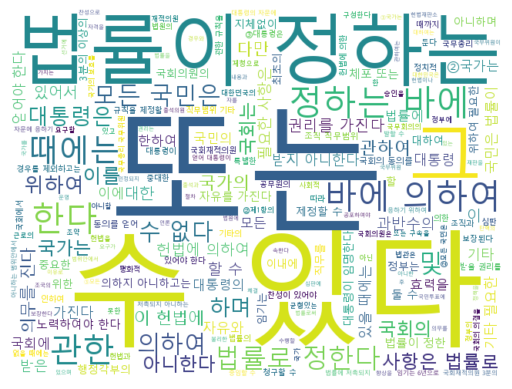

In [30]:
wc = WordCloud(background_color='white',font_path='c:/Windows/Fonts/malgun.ttf',
              width=640,height=480).generate_from_text(docs1)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 허준이 교수 서울대 졸업 축사 워드클라우드

In [67]:
docs3 = str(pd.read_csv('data/jun_speech.txt',sep='\n\n\n'))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8532\3148368429.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  docs3 = str(pd.read_csv('data/jun_speech.txt',sep='\n\n\n'))


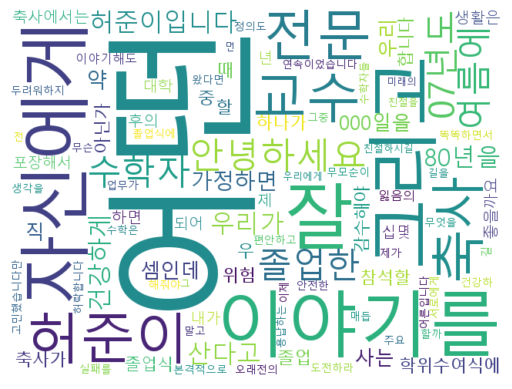

In [61]:
wc = WordCloud(background_color='white',font_path='c:/Windows/Fonts/malgun.ttf',
              width=640,height=480).generate_from_text(docs3)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 강사님

In [72]:
with open('data/jun_speech.txt', encoding='utf-8') as f:
    docs3 = f.read()

In [77]:
temp = twitter.nouns(docs3)
NN3 = [t for t in temp if len(t) >= 2 ]   # 글자길이가 2자이상인 명사만 추출
fdwords3 = FreqDist(NN3)
fdwords3.most_common(15)

[('자신', 8),
 ('축사', 6),
 ('여러분', 6),
 ('생각', 6),
 ('축하', 6),
 ('사람', 5),
 ('우리', 4),
 ('지금', 4),
 ('오늘', 4),
 ('졸업식', 3),
 ('하나', 3),
 ('이야기', 3),
 ('마음', 3),
 ('고민', 3),
 ('타인', 3)]

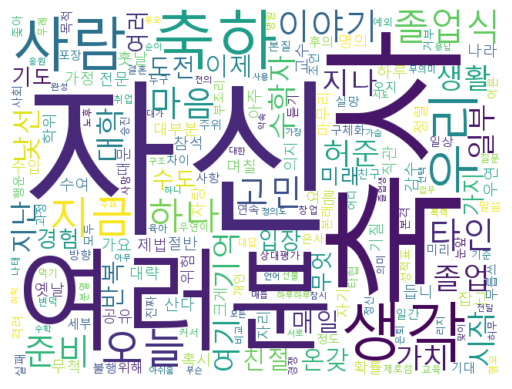

In [79]:
mc = dict(fdwords3.most_common())

wc = WordCloud(background_color='white',font_path='c:/Windows/Fonts/malgun.ttf',
              width=640,height=480).generate_from_frequencies(mc)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 다양한 색상팔레트를 이용한 워드클라우드
* jiffyclub.github.io/palettable
* 여러가지 배색을 사용하는데 도와주는 패키지
     + pip install palettable
     + pip install colorbrewer
* 색상팔레트 유형
    + sequential : 수치데이터, 순서가 있는 데이터
    + qualitative : 범주형 데이터
    + diverging : 수치형/범주형 데이터

In [81]:
pip install palettable

     -------------------------------------- 111.8/111.8 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install colorbrewer

Note: you may need to restart the kernel to use updated packages.


In [84]:
import random
from palettable.colorbrewer.sequential import Reds_9
from palettable.colorbrewer.diverging import RdYlBu_11
from palettable.colorbrewer.qualitative import Pastel2_8

## 워드클라우드에 사용할 색상함수 정의

In [89]:
def color_func(word, font_size, position,
              orientation, random_state=None, **kwargs):
    #return tuple(RdYlBu_11.colors[random.randint(0, 10)])
    return tuple(Reds_9.colors[random.randint(0, 8)])
    #return tuple(Pastel2_8.colors[random.randint(0, 7)])

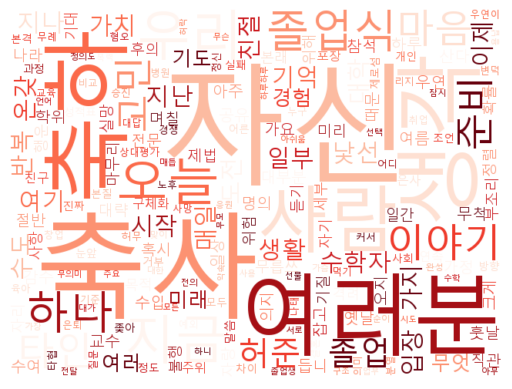

In [90]:
wc = WordCloud(background_color='white',font_path='c:/Windows/Fonts/malgun.ttf',
              width=640,height=480).generate_from_frequencies(mc)\
              .recolor(color_func=color_func)   # 색상지정
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()